<a href="https://colab.research.google.com/github/marhattar/sagarmatha/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression is a statistical technique to predict the outcome based on the input.
The data might have either linear or nonlinear relationship between dependent(target) and independent variables (predictor).The data need to follow a certain criteria in order to fit a linear regresion and have some meaningful result. The criteria are:

1) The target (dependent variable) must be numeric and contineous. (You can visually check the target.)
2) Target and predictor must correlate. (Use pd.corr() to check the correlation.
3) The residual must have a normal distribution. (Use QQ plot and distribution plot for residual.)
4) The residual should not have a trend.
5) Homoscedasticity :-Variance around the regression line is same for all independent variables “X”.
We will use train/test data to fit the regression and predict the value with its prediction interval
I made up the data for the regression fitting purpose.The data is fake.
Lets do linear regression model for a stated weight vs actual weight of the air cargo freight.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**1. Read the data with pandas**

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/marhattar/sagarmatha/master/Data/CargoWeight.csv")
x = np.array(df["Stated_Weight"]).reshape(-1, 1)
y = df["Actual_Weight"]
X_LABEL = list(df)[0]
Y_LABEL = list(df)[1]
print(df.info())
# Actual weight is my target and the data type is float. So the first criteria is fulfilled.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Stated_Weight  305 non-null    int64
 1   Actual_Weight  305 non-null    int64
dtypes: int64(2)
memory usage: 4.9 KB
None


**2. Check the correlation between target and predictor**

In [11]:
corr = df.corr()
print(corr.Actual_Weight.sort_values(ascending=False))
# The correlation coefficient shows that two varaibles are correlated. (second criteria is fulfilled)

Actual_Weight    1.000000
Stated_Weight    0.911273
Name: Actual_Weight, dtype: float64


**3. Check the residual follows the normal distribution and does not have a specific trend.**

<Figure size 1080x540 with 0 Axes>

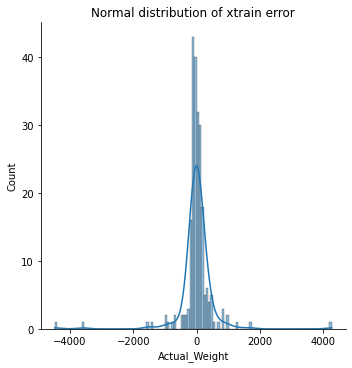

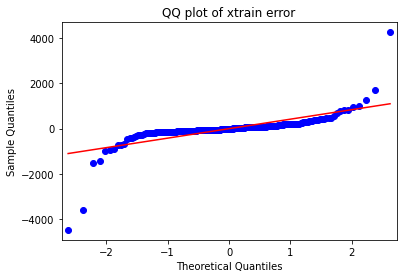

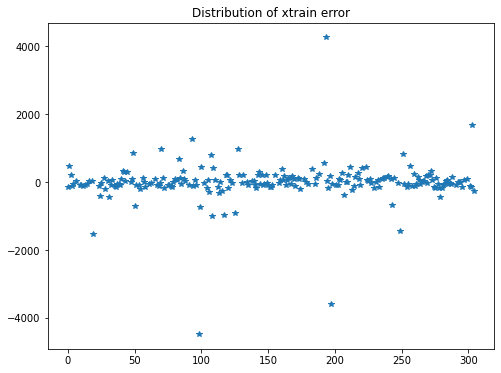

In [12]:
# I use Train/Test data to fit the regression line and extract the residual from there
# Fit the Train data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
# Create the model
model = LinearRegression().fit(x_train, y_train)
# Predict the train data using this model
y_pred_train = model.predict(x_train)
# Calculate the residual of the model on train data
error_train = y_train - y_pred_train
# Plot the error
fig = plt.figure(figsize=(12, 6), dpi=90)
sns.displot(error_train, kde=True)
plt.title("Normal distribution of xtrain error")
# The residual has no trend as depicted in the below figure
sm.qqplot(error_train, line="r")
plt.title("QQ plot of xtrain error")
plt.figure(figsize=(8, 6))
plt.plot(error_train,'*')
plt.title("Distribution of xtrain error")
plt.show()

**4. Regression Equation**

R-Squared of the train fit:=>  0.9080843196139794
Reg-coeff of reg line:=>  [0.95807226]
intercept of reg line:=>  121.33398631429463
Regression Equation is y=[0.95807226]*x+121.33398631429463
R-Squared of the Test fit:=>  0.5325362379040004


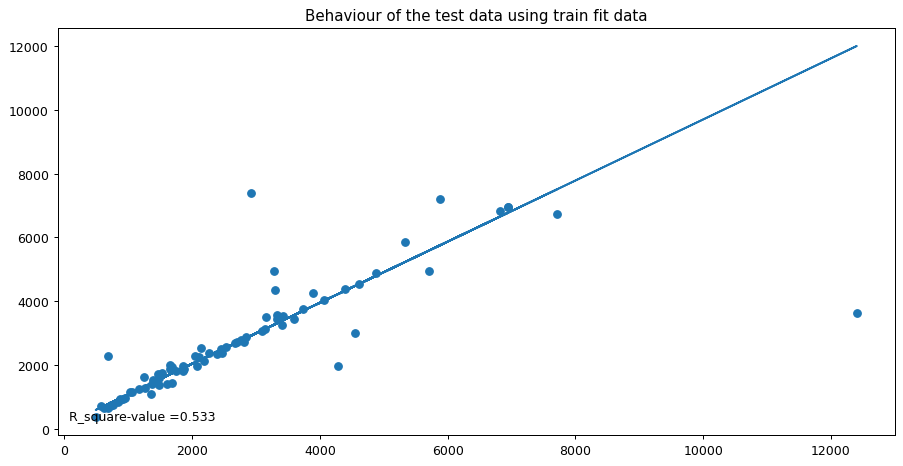

In [13]:
# Find the regression coefficients and estimated values
# R-squared value of the Train fit
r_sq_train = model.score(x_train, y_train)

# Print some statistical values
print("R-Squared of the train fit:=> ", r_sq_train)
print("Reg-coeff of reg line:=> ", model.coef_)
print("intercept of reg line:=> ", model.intercept_)
print("Regression Equation is y={}*x+{}".format(model.coef_, model.intercept_))

# Lets see how the regression equation works for Test data set
y_pred_test=model.predict(x_test)
# R-squared value of the Test fit
r_sq_test = model.score(x_test, y_test)
print("R-Squared of the Test fit:=> ", r_sq_test)
fig = plt.figure(figsize=(12, 6), dpi=90)
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_test)
plt.title("Behaviour of the test data using train fit data")
plt.text(75,260, "R_square-value ={}".format(np.round(r_sq_test,3)) )
plt.show()

**5. Presentation of the data**

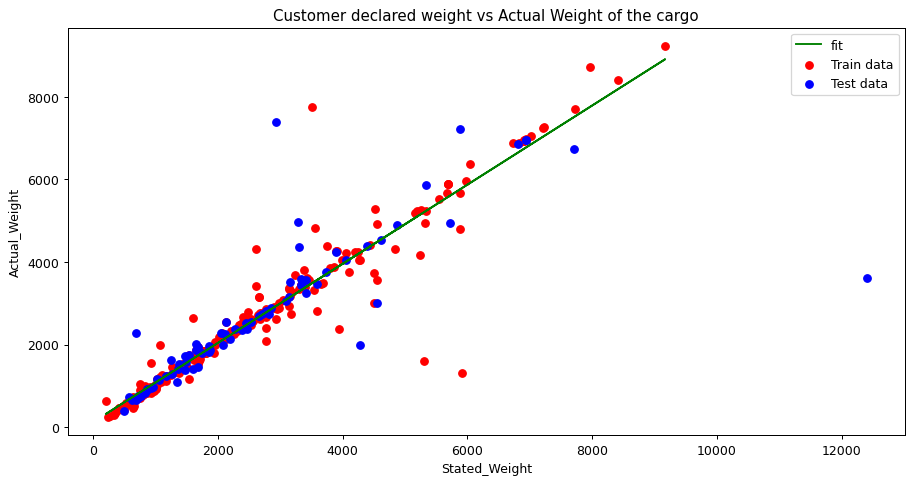

In [14]:
def plot_fig():
    fig = plt.figure(figsize=(12, 6), dpi=90)
    plt.scatter(x_train, y_train, c="r", label="Train data")
    plt.scatter(x_test, y_test, c="b", label="Test data")
    plt.plot(x_train, y_pred_train, "g-", label="fit")
    plt.xlabel(X_LABEL)
    plt.ylabel(Y_LABEL)
    plt.title("Customer declared weight vs Actual Weight of the cargo")
    plt.legend()
plot_fig()

**6. Prediction of data and prediction interval**

Prediction Interval: 1126.710
95% likelihood that the true value is between [ -947.89143766  5796.93728042 18294.98992634] and [ 1305.52808162  8050.35679969 20548.40944562]
True value: [  178.818  6923.647 19421.7  ]


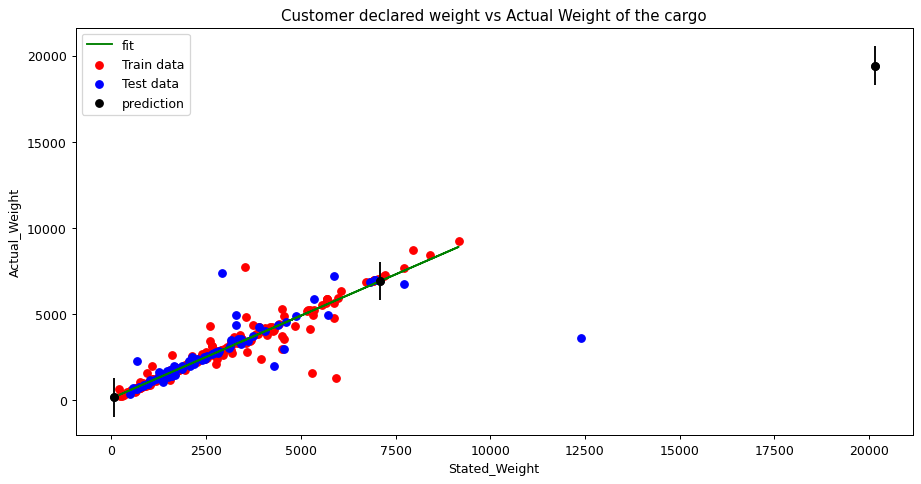

In [15]:
sum_errors = np.sum((y_train - y_pred_train) ** 2)
stdev = np.sqrt(1 / (len(y_train) - 2) * sum_errors)
interval = 1.96 * stdev
print("Prediction Interval: %.3f" % interval)
predict = [60,7100,20145]
# response = "y"
# while response == "y":
#     res = False
#     while res == False:
#         x_p = input(
#             "Enter the presure in MPa to predict the freezing point of water:=>"
#         )
#         if x_p.isnumeric():
#             res = True
#         else:
#             print("Please enter the NUMERIC value only: ")
#     predict.append(float(x_p))

#     response = input("Do you want to predict more? 'y/n'")

x_new = np.array(predict).reshape(-1, 1)
y_new = model.predict(x_new)
lower, upper = y_new - interval, y_new + interval
print("95% likelihood that the true value is between {} and {}".format(lower,upper))
print("True value: {}".format(np.round(y_new,3)))
# plot dataset and prediction with interval
plot_fig()
plt.scatter(x_new, y_new, color="black", label="prediction")
plt.errorbar(x_new, y_new, yerr=interval, color="black", fmt="o")
plt.legend()

# Display the plot
plt.show()

**Conclusion:** The regression line fit to the train data follows all the criteria for linear regression. The model I fit to train data also fits the test data. In this example my test data is 25% of the entire data set. The prediction interval of the predicted data shows the the predcition error is within the noise of the data. Some of the outliers are due to the fact that the ULD contained unmanifested and undeclared cargo. Sometimes the builders might have the wrong ULD number and accounts for the large descrepancy on the stated weight and the actual weight of the cargo in the ULD. We can identify the outliers and remove it before we do the fitting to improve the outcome of the result.